# LEVEL -2 

# Task 2: Cuisine Combination
    1. Identify the most common combinations of cuisines in the dataset.
    2. Determine if certain cuisine combinations tend to have higher ratings.

In [1]:
# Import library files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('Dataset.csv')
data


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [2]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# 1. Identify the most common combinations of cuisines in the dataset.

The 10 most common cuisine combinations are:
1. North Indian: 3960 times
2. Chinese: 2735 times
3. Fast Food: 1986 times
4. Mughlai: 995 times
5. Italian: 764 times
6. Bakery: 745 times
7. Continental: 736 times
8. Cafe: 703 times
9. Desserts: 653 times
10. South Indian: 636 times


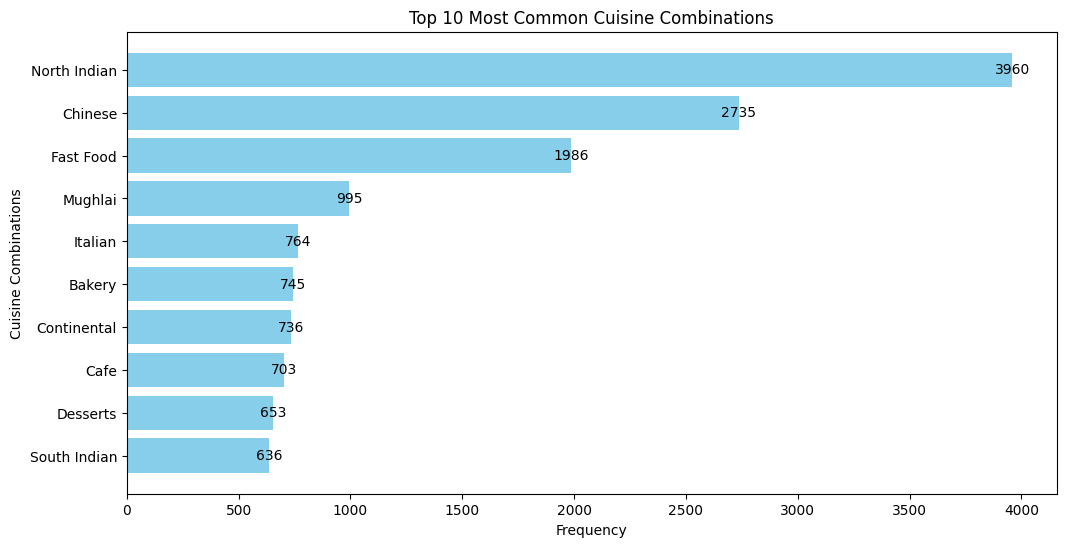

In [3]:
from collections import Counter

# Extract the 'Cuisines' column
cuisines_column = data['Cuisines']

# Combine all the cuisines into a single string, separated by commas
all_cuisines = ', '.join(str(cuisine) for cuisine in cuisines_column)

# Split the combined cuisines into a list
cuisine_list = all_cuisines.split(', ')

# Use Counter to count the occurrences of each cuisine
cuisine_counts = Counter(cuisine_list)

# Get the most common cuisine combinations and their counts
most_common_combinations = cuisine_counts.most_common()

# Print the top N most common combinations (change N as needed)
N = 10
print(f"The {N} most common cuisine combinations are:")
for i, (combination, count) in enumerate(most_common_combinations[:N], 1):
    print(f"{i}. {combination}: {count} times")


# Extract the top N most common combinations and their counts
N = 10
top_combinations = [item[0] for item in most_common_combinations[:N]]
top_counts = [item[1] for item in most_common_combinations[:N]]

# Create a bar chart to visualize the top N combinations
plt.figure(figsize=(12, 6))
bars = plt.barh(top_combinations, top_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Cuisine Combinations')
plt.title('Top 10 Most Common Cuisine Combinations')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most common combination at the top

for bar, count in zip(bars, top_counts):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2, str(count), ha='center', va='center')

plt.show()


# 2. Determine if certain cuisine combinations tend to have higher ratings.

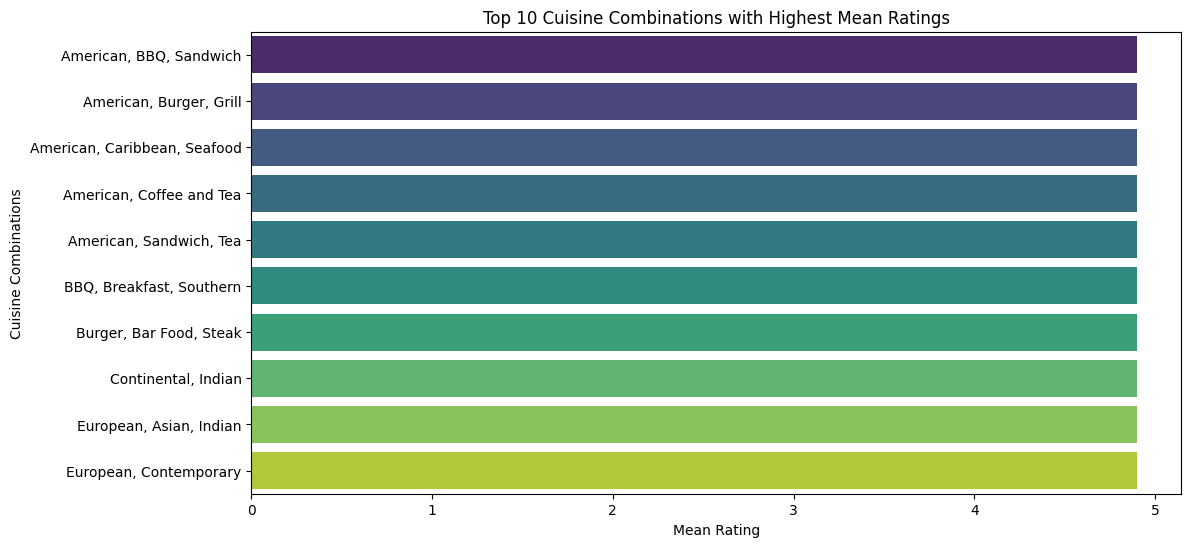

,Cuisines,Aggregate rating
13,"American, BBQ, Sandwich",4.9
33,"American, Burger, Grill",4.9
37,"American, Caribbean, Seafood",4.9
41,"American, Coffee and Tea",4.9
93,"American, Sandwich, Tea",4.9
169,"BBQ, Breakfast, Southern",4.9
302,"Burger, Bar Food, Steak",4.9
683,"Continental, Indian",4.9
796,"European, Asian, Indian",4.9
803,"European, Contemporary",4.9


In [4]:
from scipy.stats import f_oneway

# Group data by cuisine combinations and calculate mean ratings
cuisine_ratings = data.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Visualize the distribution of ratings for the top N cuisine combinations
N = 10
top_combinations = cuisine_ratings.nlargest(N, 'Aggregate rating')


plt.figure(figsize=(12, 6))
sns.barplot(data=top_combinations, x='Aggregate rating', y='Cuisines', palette='viridis')
plt.xlabel('Mean Rating')
plt.ylabel('Cuisine Combinations')
plt.title(f'Top {N} Cuisine Combinations with Highest Mean Ratings')

plt.show()
top_combinations